In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import *
import matplotlib.gridspec as gridspec
import seaborn as sns

In [28]:
fname = "{}/three_year.csv".format(DATA_ODDS_RATIO_MODULE)
df = pd.read_csv(fname)

In [29]:
# No data
df = df[~(df['state_code'] == 25)]

In [109]:
def get_labels(xticks, gap):
#     l = ["MA {}".format(i.split("_")[0], i.split("_")[-1]) for i in xticks]
    l = ["MA\n{}".format(i.split("_")[0]) for i in xticks]
    return [elem if i % gap == 0 else '' for i, elem in enumerate(l)]

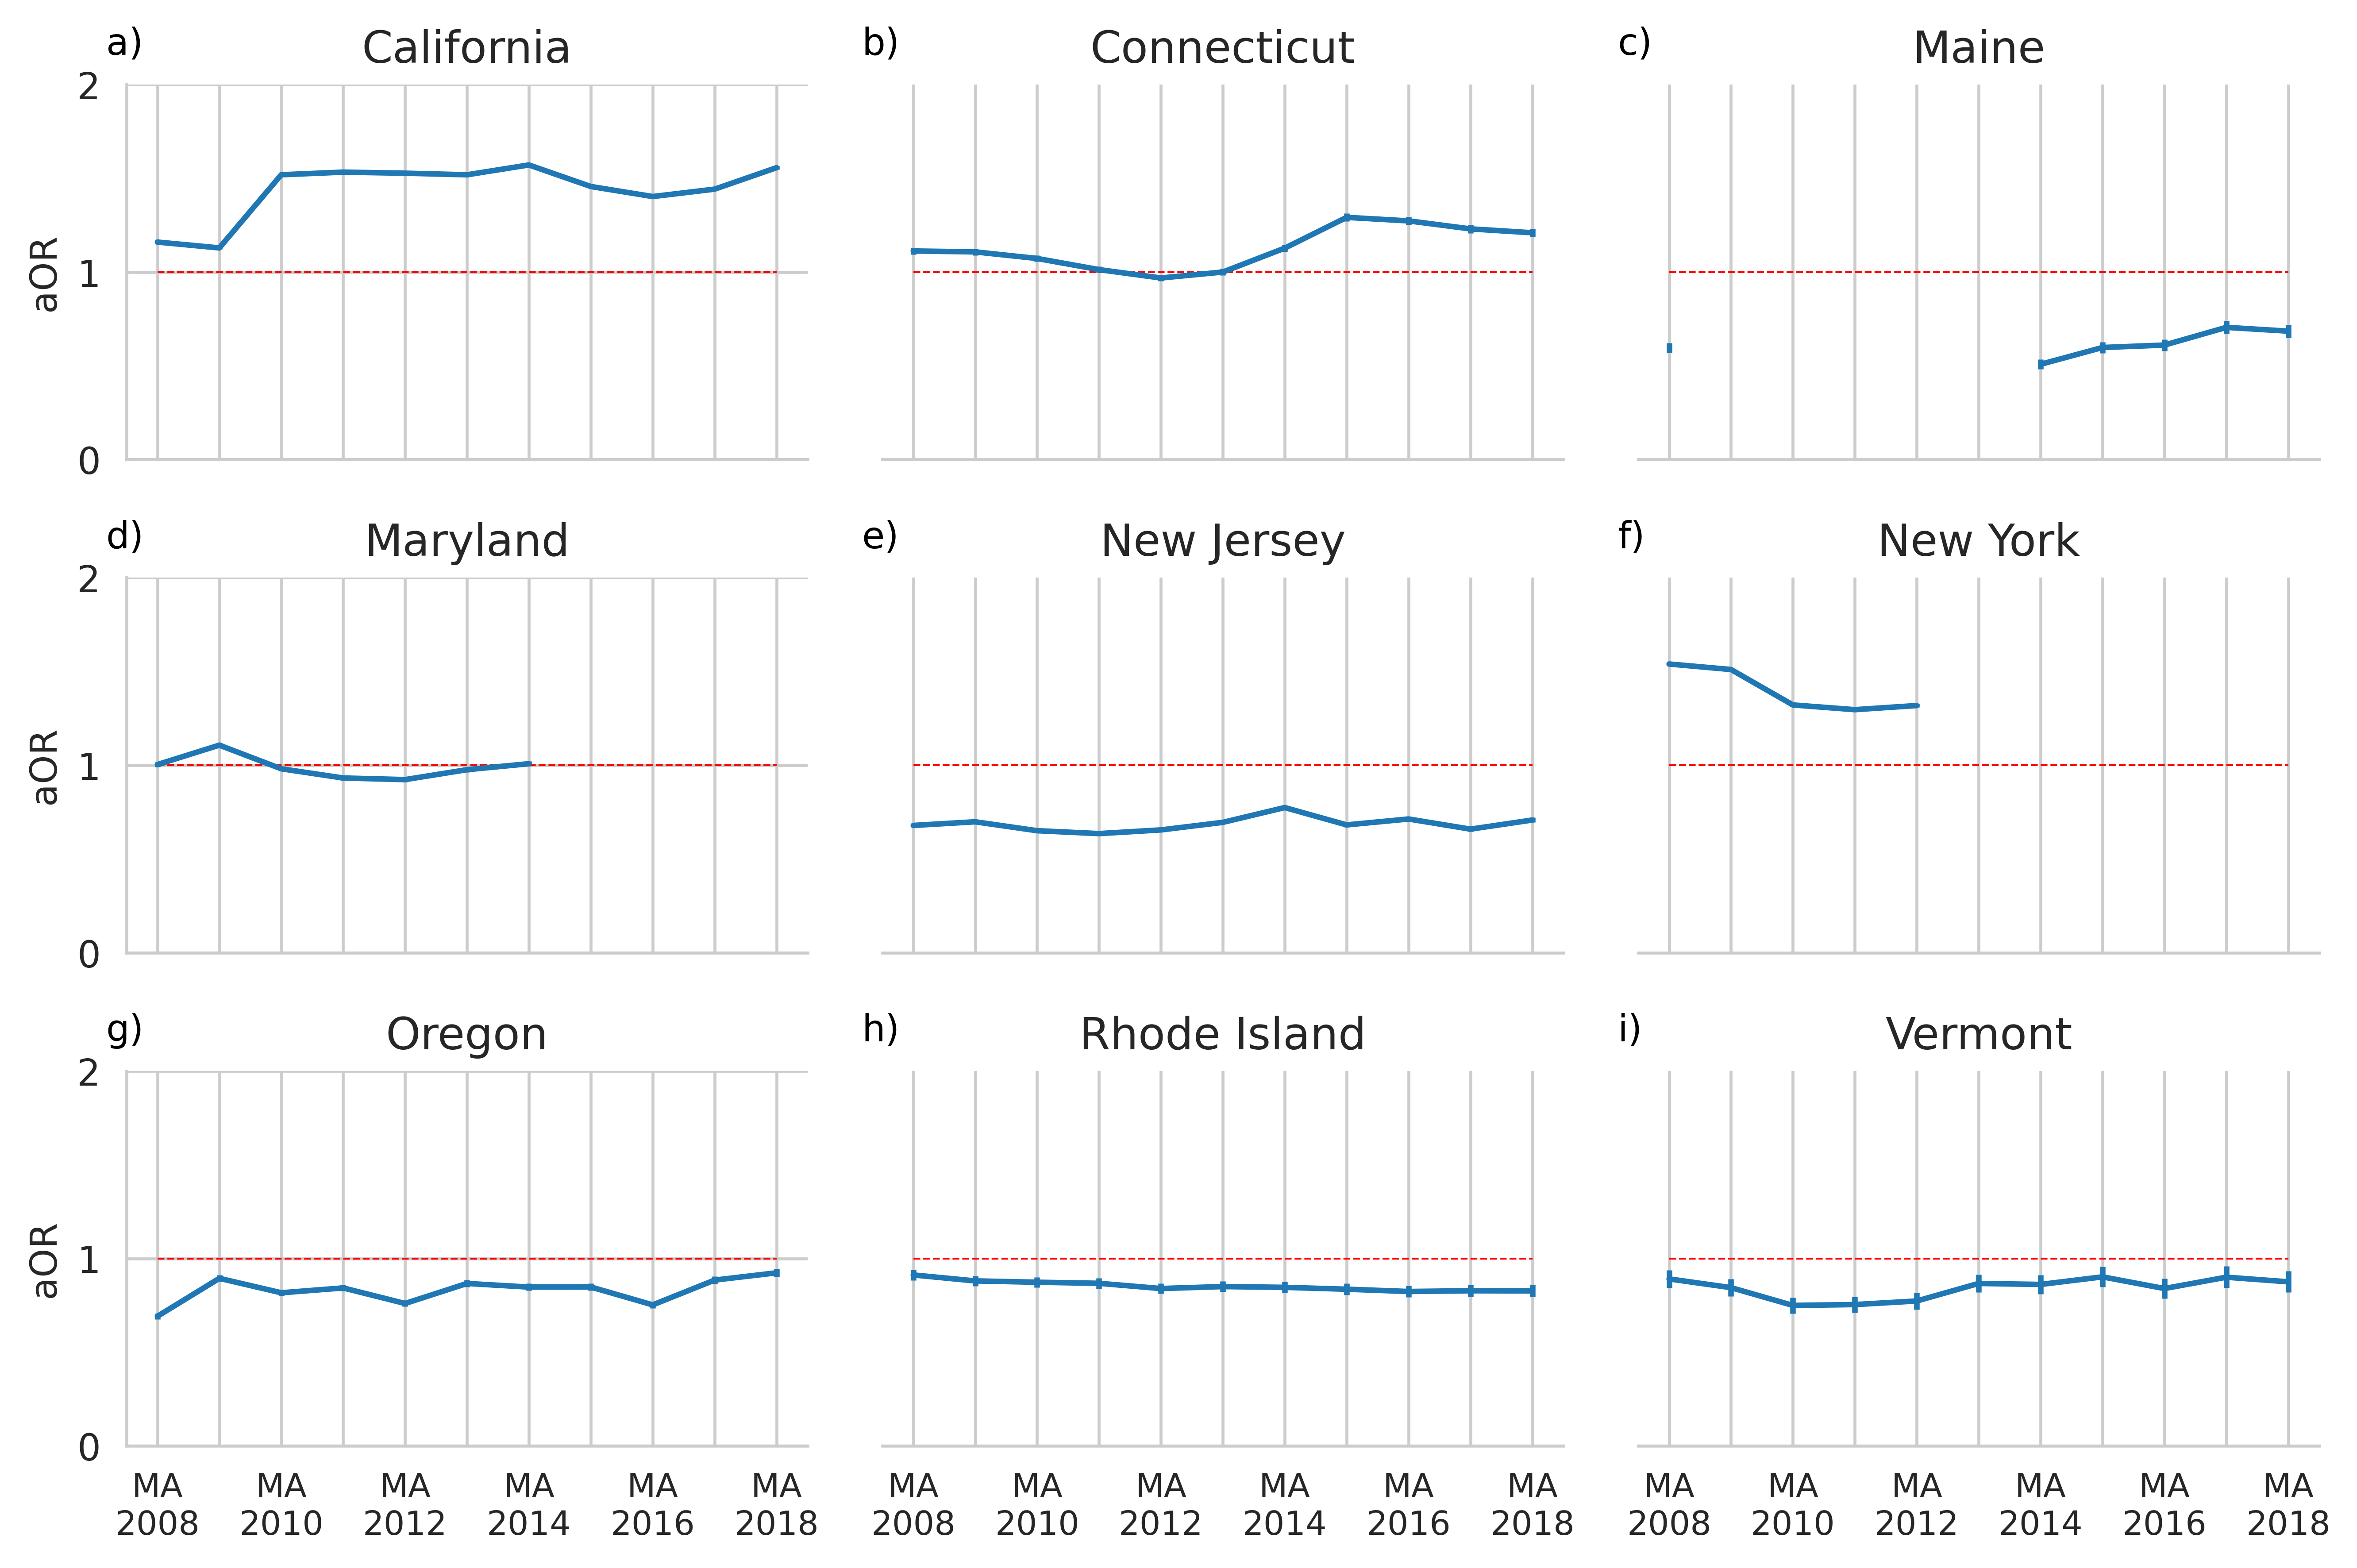

In [120]:
sns.set_style("whitegrid")
gap = 2
plt.close()
plt.figure(figsize=(9, 6), dpi=600)
gs = gridspec.GridSpec(3, 3)
rows = [(i, j) for i in range(0, 3) for j in range(0, 3)]
unique_state_codes = sorted(df['state_code'].unique().tolist())
for index, state_code in enumerate(unique_state_codes):
    row, col = rows[index][0], rows[index][1]
    ax = plt.subplot(gs[row, col])
    ax.text(-0.03, 1.08, "{})".format(chr(97+index)), transform=ax.transAxes, size=10, color='black')
    tdf = df[df['state_code'] == state_code].reset_index()
    state_name = tdf['State Name'].unique()[0]
    xticks = tdf['year'].tolist()
    y = tdf['Odds Ratio'].tolist()
    ci_95 = tdf['95%'].tolist()
    yerr = [i-j for i, j in zip(ci_95, y)]
    x = list(range(len(xticks)))
    plt.errorbar(x, y, yerr = yerr)
    plt.ylim(0, 2)
    plt.hlines(1, xmin=min(x), xmax=max(x), color='r', linestyles='--', linewidth=0.5)
    plt.title(state_name)
    plt.yticks([0, 1, 2], [0, 1, 2])
    plt.ylabel("aOR")
#     sns.despine()
    if col!=0:
        ax.get_yaxis().set_visible(False)
        ax.spines['left'].set_visible(False)
    if row != 2:
        plt.xticks(x, [""]*len(x), fontsize=1, rotation=0)
    else:
        plt.xticks(x, get_labels(xticks, gap), fontsize=9, rotation=0)

#         ax.get_xaxis().set_visible(False)
#         ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    
    
    
plt.tight_layout()
plt.savefig("output_images/odds_ratio_three_year_plot.png", bbox_inches='tight')

In [59]:
 ["{}-{}".format(i.split("_")[0], i.split("_")[-1]) for i in xticks]

['2008-2010',
 '2009-2011',
 '2010-2012',
 '2011-2013',
 '2012-2014',
 '2013-2015',
 '2014-2016',
 '2015-2017',
 '2016-2018',
 '2017-2019',
 '2018-2020']

'a'

In [122]:
df[df['state_code'] == 9]

,state_code,year,Odds Ratio,5%,95%,State Name,State Code
1,9,2008_2009_2010,1.112315,1.094993,1.129912,Connecticut,9
11,9,2009_2010_2011,1.107446,1.090268,1.124895,Connecticut,9
21,9,2010_2011_2012,1.072353,1.055732,1.089235,Connecticut,9
31,9,2011_2012_2013,1.012918,0.996797,1.029299,Connecticut,9
41,9,2012_2013_2014,0.968350,0.952389,0.984578,Connecticut,9
51,9,2013_2014_2015,1.000016,0.983177,1.017142,Connecticut,9
61,9,2014_2015_2016,1.127462,1.108654,1.146590,Connecticut,9
71,9,2015_2016_2017,1.291530,1.270654,1.312750,Connecticut,9
81,9,2016_2017_2018,1.272809,1.251259,1.294730,Connecticut,9
91,9,2017_2018_2019,1.230117,1.208499,1.252121,Connecticut,9


In [63]:
"2008"[-2:]

'08'

In [93]:
0%3

0